In [1]:
import sys
sys.path.append("..")

from cellmate.image_measure import ImageMeasure
from skimage.io import imread, imsave
import numpy as np
import matplotlib.pyplot as plt
from cellmate.visualize import COLORMAP
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2

color_mont_list = COLORMAP['mont'].list()
color_mont_linear = COLORMAP['mont'].linear()

In [2]:
image = imread("./morphologyquantification_createdshape.tif")
image_measure = ImageMeasure(image)
labels = [1001, 1002, 2003, 2004, 4009, 4006, 4007, 4008, 4010]

/var/folders/py/kmy_9_hj3791f862dxgf7r_00000gn/T/ipykernel_10229/3263362276.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1, i].scatter(center[1], center[0], marker="o", s=400, c=color_mont_list(7), zorder=10, edgecolors=color_mont_list(0), label='Center')
/var/folders/py/kmy_9_hj3791f862dxgf7r_00000gn/T/ipykernel_10229/3263362276.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1, i].scatter(start_p[1], s

Text(0.5, 0.98, 'Cellular Geometric Feature Quantification Across Mating Phases')

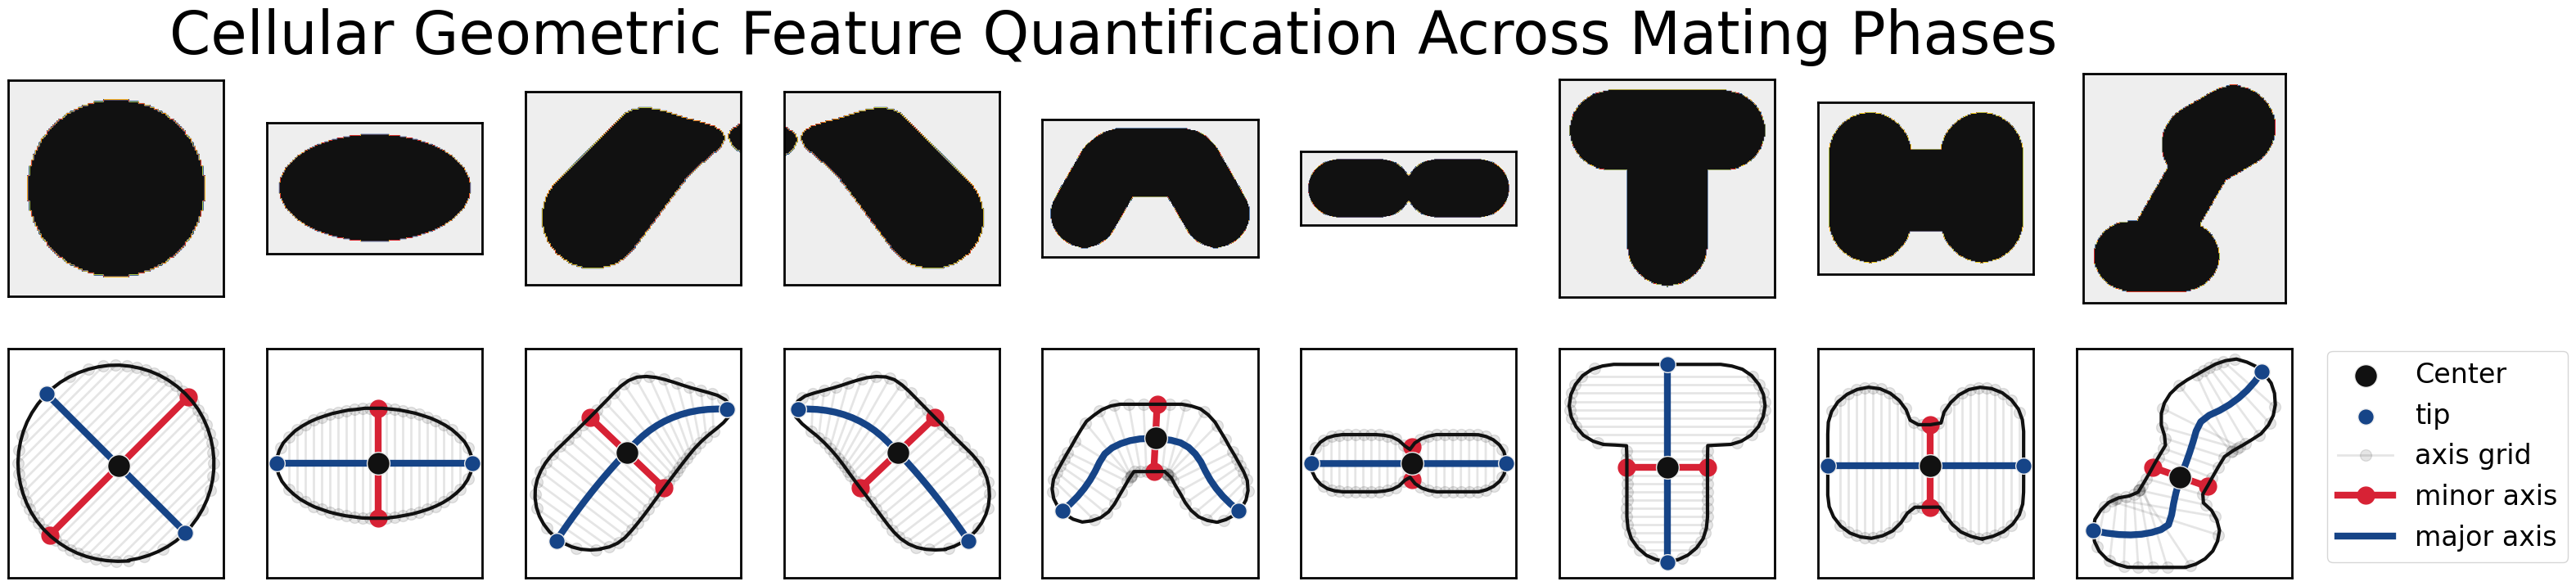

In [6]:
f, axs = plt.subplots(2, len(labels), figsize=(4*len(labels), 8))
for i in range(0, len(labels)):
    label = int(labels[i])
    bbox = image_measure.bbox(label=label)
    cropped_image = image[max(0, bbox[0]-10):bbox[2]+10, max(0, bbox[1]-10):bbox[3]+10]
    coords = image_measure.coordinate(label=label)
    coords = np.vstack([coords, coords[0:1]])
    center = image_measure.center(label=label)
    minor_grid = image_measure.skeleton_minor_grid(label=label)


    skeleton = image_measure.skeleton(label=label)
    start_p = skeleton[0]
    end_p = skeleton[-1]

    # center_skeleton = skeleton[center_index]
    
    minor_axis = image_measure.skeleton_minor_axis(label=label)
    
    axs[0, i].imshow(cropped_image, cmap=color_mont_linear)

    axs[1, i].scatter(center[1], center[0], marker="o", s=400, c=color_mont_list(7), zorder=10, edgecolors=color_mont_list(0), label='Center')
    axs[1, i].scatter(start_p[1], start_p[0], marker="o", s=200, c=color_mont_list(1),  zorder=9, edgecolors=color_mont_list(0), label="tip")
    axs[1, i].scatter(end_p[1], end_p[0], marker="o", s=200, c=color_mont_list(1),  zorder=9, edgecolors=color_mont_list(0))

    
    axs[1, i].plot(minor_grid[0][0:1,1], minor_grid[0][0:1,0], 'o-', c='black', alpha=0.1, linewidth=2.0,markersize=10,label="axis grid")
    for j in range(1, len(minor_grid)):
        axs[1, i].plot(minor_grid[j][:,1], minor_grid[j][:,0], 'o-', c='black', alpha=0.1, linewidth=2.0,markersize=10)
    
    axs[1, i].plot(minor_axis[:,1], minor_axis[:,0], 'o-', c=color_mont_list(3), linewidth=6.0, markersize=15, label="minor axis")
    
    axs[1, i].plot(coords[:, 1], coords[:, 0], c=color_mont_list(7), linewidth=3.0)


    
    axs[1, i].plot(skeleton[:, 1], skeleton[:, 0], c=color_mont_list(1), linewidth=6.0, label="major axis")

    axs[1, i].invert_yaxis()
    
    axs[1, i].axis('equal')

    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    if i == len(labels)-1:
        axs[1, i].legend(bbox_to_anchor=(1.1, 1.05),fontsize=24)
f.suptitle("Cellular Geometric Feature Quantification Across Mating Phases", fontsize=52)
# plt.savefig("./figure_morphology_quantification/MatingPhases1.svg", dpi=300)

In [9]:
### real example

In [8]:
image = imread("./morphology quantification_realexample.tif")
labels = [1101,1151,1120,1105,4181,4006,4201,4204,3199]
mask = np.isin(image[0], labels)
image_measure = ImageMeasure(image[0]*mask)

/var/folders/py/kmy_9_hj3791f862dxgf7r_00000gn/T/ipykernel_10229/3486085789.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1, i].scatter(center[1], center[0], marker="o", s=400, c=color_mont_list(7), zorder=10, edgecolors=color_mont_list(0), label='Center')
/var/folders/py/kmy_9_hj3791f862dxgf7r_00000gn/T/ipykernel_10229/3486085789.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[1, i].scatter(start_p[1], s

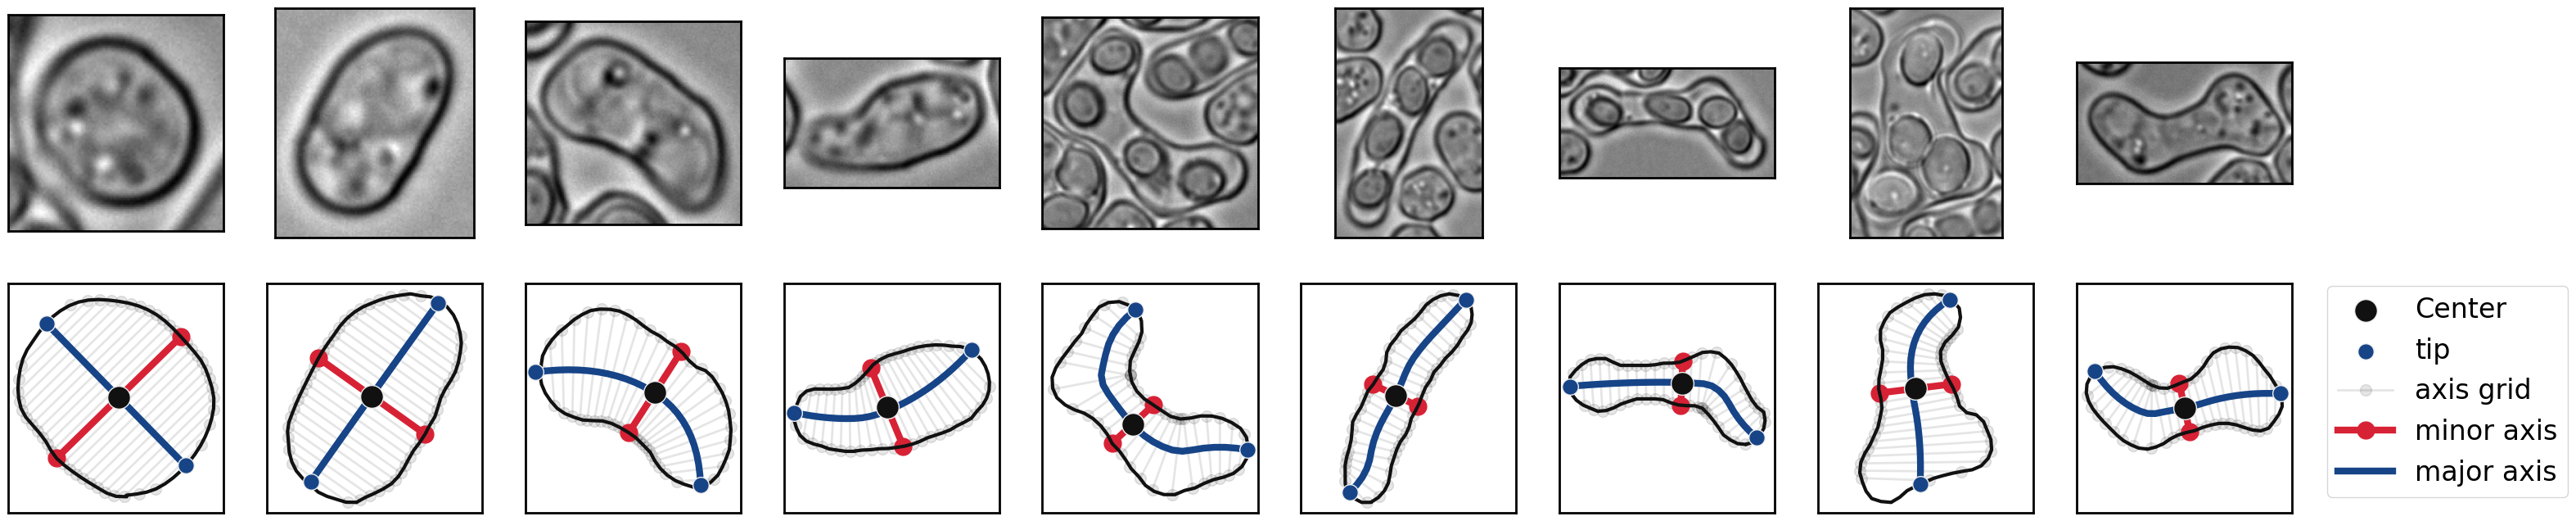

In [10]:
f, axs = plt.subplots(2, len(labels), figsize=(4*len(labels), 8))
for i in range(0, len(labels)):
    label = int(labels[i])
    bbox = image_measure.bbox(label=label)
    cropped_image = image[1][max(0, bbox[0]-10):bbox[2]+10, max(0, bbox[1]-10):bbox[3]+10]
    coords = image_measure.coordinate(label=label)
    coords = np.vstack([coords, coords[0:1]])
    center = image_measure.center(label=label)
    minor_grid = image_measure.skeleton_minor_grid(label=label)


    skeleton = image_measure.skeleton(label=label)
    start_p = skeleton[0]
    end_p = skeleton[-1]

    # center_skeleton = skeleton[center_index]
    
    minor_axis = image_measure.skeleton_minor_axis(label=label)
    
    axs[0, i].imshow(cropped_image, cmap='gray')

    axs[1, i].scatter(center[1], center[0], marker="o", s=400, c=color_mont_list(7), zorder=10, edgecolors=color_mont_list(0), label='Center')
    axs[1, i].scatter(start_p[1], start_p[0], marker="o", s=200, c=color_mont_list(1),  zorder=9, edgecolors=color_mont_list(0), label="tip")
    axs[1, i].scatter(end_p[1], end_p[0], marker="o", s=200, c=color_mont_list(1),  zorder=9, edgecolors=color_mont_list(0))

    
    axs[1, i].plot(minor_grid[0][0:1,1], minor_grid[0][0:1,0], 'o-', c='black', alpha=0.1, linewidth=2.0,markersize=10,label="axis grid")
    for j in range(1, len(minor_grid)):
        axs[1, i].plot(minor_grid[j][:,1], minor_grid[j][:,0], 'o-', c='black', alpha=0.1, linewidth=2.0,markersize=10)
    
    axs[1, i].plot(minor_axis[:,1], minor_axis[:,0], 'o-', c=color_mont_list(3), linewidth=6.0, markersize=15, label="minor axis")
    
    axs[1, i].plot(coords[:, 1], coords[:, 0], c=color_mont_list(7), linewidth=3.0)


    
    axs[1, i].plot(skeleton[:, 1], skeleton[:, 0], c=color_mont_list(1), linewidth=6.0, label="major axis")

    axs[1, i].invert_yaxis()
    
    axs[1, i].axis('equal')

    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    if i == len(labels)-1:
        axs[1, i].legend(bbox_to_anchor=(1.1, 1.05),fontsize=24)
# f.suptitle("Cellular Geometric Feature Quantification Across Mating Phases", fontsize=52)
# plt.savefig("./figure_morphology_quantification/MatingPhases2.svg", dpi=300)